# Titanic Survival Prediction Project

## 1. Project Overview
In this project, we will explore the Titanic dataset to predict whether a passenger survived or not. The dataset contains features such as age, sex, passenger class, and more, which will be used to build a machine learning model.

## 2. Objective
The objective of this project is to practice the following data science skills:
- Data loading and exploration
- Data cleaning and preprocessing
- Data visualization
- Feature engineering
- Building machine learning models
- Model evaluation

## 3. Dataset
The dataset used in this project is the Titanic dataset, which is available on [Kaggle](https://www.kaggle.com/c/titanic/data). It contains information about passengers on the Titanic, including whether they survived or not.

### Step 1: Data Loading and Exploration

In this step, we will load the Titanic dataset and explore its structure. This includes checking the first few rows of the data, understanding the columns, and checking for any missing values.

In [47]:
import pandas as pd
# Load the Titanic dataset from the local file
file_path = 'titanic.csv'
titanic_data = pd.read_csv(file_path)
# Display the first 5 rows of the dataset to get an overview
titanic_data.head(5)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Step 2: Data Cleaning

In this step, we will clean the Titanic dataset. This involves:
1. Handling missing values.
2. Converting categorical variables into numerical format.
3. Removing duplicates or irrelevant columns.


In [49]:
# Check for missing values in the dataset
missing_data = titanic_data.isnull().sum()
# Display missing data for each column
missing_data


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [51]:
# Fill missing 'Age' values with the median value
titanic_data['Age'] = titanic_data['Age'].fillna(titanic_data['Age'].median())

# Verify that there are no missing values in 'Age' anymore
titanic_data['Age'].isnull().sum()

0

In [53]:
titanic_data=titanic_data.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin', 'Embarked', 'Fare','SibSp','Parch'])

In [55]:
titanic_data.head(5)

,Survived,Pclass,Sex,Age
0,0,3,male,22.0
1,1,1,female,38.0
2,1,3,female,26.0
3,1,1,female,35.0
4,0,3,male,35.0


In [24]:
# One-hot encode the 'Sex' column
titanic_data = pd.get_dummies(titanic_data, columns=['Sex'], drop_first=True)

# Display the cleaned dataset
titanic_data.head(5)

,Survived,Pclass,Age,Sex_male
0,0,3,34.5,True
1,1,3,47.0,False
2,0,2,62.0,True
3,0,3,27.0,True
4,1,3,22.0,False


## Step 3: Data Visualization

In this step, we will visualize the dataset to explore the relationships between different features and the target variable (`Survived`). We will:
1. Visualize the distribution of key features such as `Age`, `Pclass`, and `Sex_male`.
2. Investigate how these features correlate with the survival rate.
3. Use various plots like histograms, bar plots, and box plots for deeper insights.


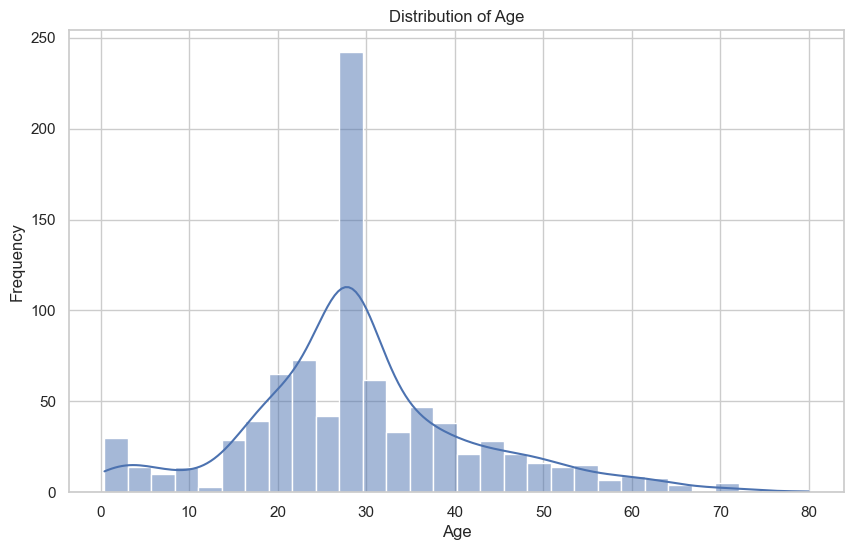

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the plot style
sns.set(style="whitegrid")

# Plot the distribution of Age
plt.figure(figsize=(10, 6))
sns.histplot(titanic_data['Age'], bins=30, kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

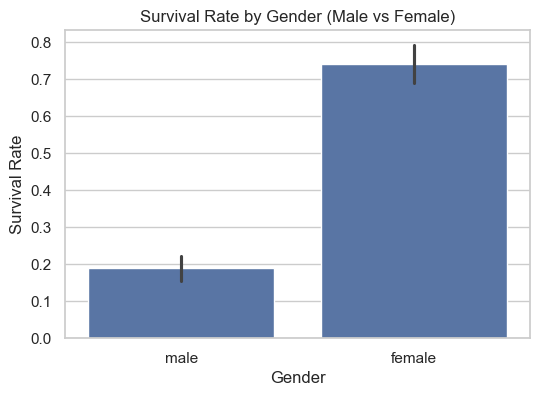

In [59]:
# Plot Survival Rate by Sex (using the original 'Sex' column)
plt.figure(figsize=(6, 4))
sns.barplot(x='Sex', y='Survived', data=titanic_data)
plt.title('Survival Rate by Gender (Male vs Female)')
plt.xlabel('Gender')
plt.ylabel('Survival Rate')
plt.show()

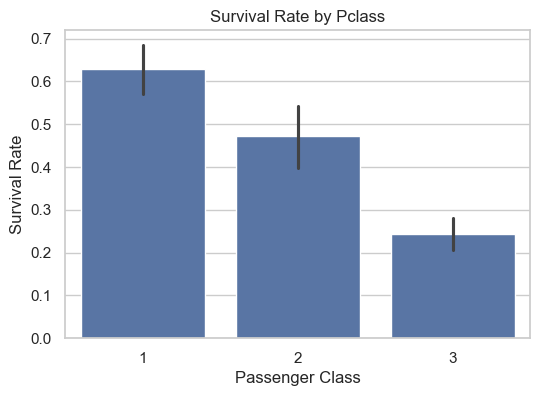

In [61]:
# Survival rate by Pclass
plt.figure(figsize=(6, 4))
sns.barplot(x='Pclass', y='Survived', data=titanic_data)
plt.title('Survival Rate by Pclass')
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')
plt.show()

## Step 4: Model Building

In this step, we will:
1. Prepare the data by encoding categorical variables and splitting the dataset into training and test sets.
2. Train a classification model (e.g., Logistic Regression or Decision Tree).
3. Evaluate the model's performance using accuracy, confusion matrix, and other relevant metrics.


In [64]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler

# Encode the categorical variable 'Sex' to 'Sex_male' if it's not already done
titanic_data['Sex_male'] = titanic_data['Sex'].map({'male': 1, 'female': 0})

# Drop irrelevant columns and prepare features and target
features = ['Pclass', 'Age', 'Sex_male']
X = titanic_data[features]
y = titanic_data['Survived']
# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features (optional, but often helpful for logistic regression)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the Logistic Regression model
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print results
print(f"Accuracy: {accuracy:.4f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)


Accuracy: 0.8045
Confusion Matrix:
[[91 14]
 [21 53]]
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.87      0.84       105
           1       0.79      0.72      0.75        74

    accuracy                           0.80       179
   macro avg       0.80      0.79      0.80       179
weighted avg       0.80      0.80      0.80       179



In [88]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

# Set up the parameter grid for SVM
param_grid = {
    'C': [0.1, 1, 10, 100],         # Regularization parameter
    'kernel': ['linear', 'rbf'],    # Kernel types (linear and radial basis function)
    'gamma': ['scale', 'auto']     # Kernel coefficient for 'rbf'
}

# Initialize the SVM model
svm_model = SVC(random_state=42,probability=True)

# Set up GridSearchCV with 5-fold cross-validation
grid_search_svm = GridSearchCV(estimator=svm_model, param_grid=param_grid, 
                               cv=5, n_jobs=-1, verbose=2)

# Fit the grid search to the training data
grid_search_svm.fit(X_train, y_train)

# Print the best parameters found by GridSearchCV
print(f"Best Parameters for SVM: {grid_search_svm.best_params_}")

# Get the best SVM model
best_svm_model = grid_search_svm.best_estimator_

# Evaluate the optimized SVM model
y_pred_optimized_svm = best_svm_model.predict(X_test)

# Evaluate the optimized model
print("Optimized SVM Accuracy:", accuracy_score(y_test, y_pred_optimized_svm))
print("Optimized SVM Confusion Matrix:\n", confusion_matrix(y_test, y_pred_optimized_svm))
print("Optimized SVM Classification Report:\n", classification_report(y_test, y_pred_optimized_svm))


Fitting 5 folds for each of 16 candidates, totalling 80 fits
Best Parameters for SVM: {'C': 100, 'gamma': 'scale', 'kernel': 'rbf'}
Optimized SVM Accuracy: 0.7877094972067039
Optimized SVM Confusion Matrix:
 [[88 17]
 [21 53]]
Optimized SVM Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.84      0.82       105
           1       0.76      0.72      0.74        74

    accuracy                           0.79       179
   macro avg       0.78      0.78      0.78       179
weighted avg       0.79      0.79      0.79       179



## Step 5: Model Evaluation and Conclusion

In this step, we will:
1. **Evaluate the Optimized Model** using metrics such as accuracy, confusion matrix, and classification report.
2. **Visualize the Results** by plotting:
   - Confusion Matrix
   - ROC Curve (Receiver Operating Characteristic)
   - Precision-Recall Curve
3. **Draw Conclusions** based on the evaluation:
   - Discuss the overall model performance.
   - Suggest potential improvements or future steps.


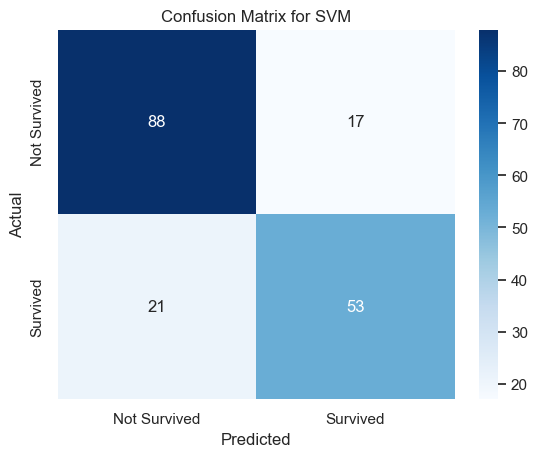

SVM Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.84      0.82       105
           1       0.76      0.72      0.74        74

    accuracy                           0.79       179
   macro avg       0.78      0.78      0.78       179
weighted avg       0.79      0.79      0.79       179



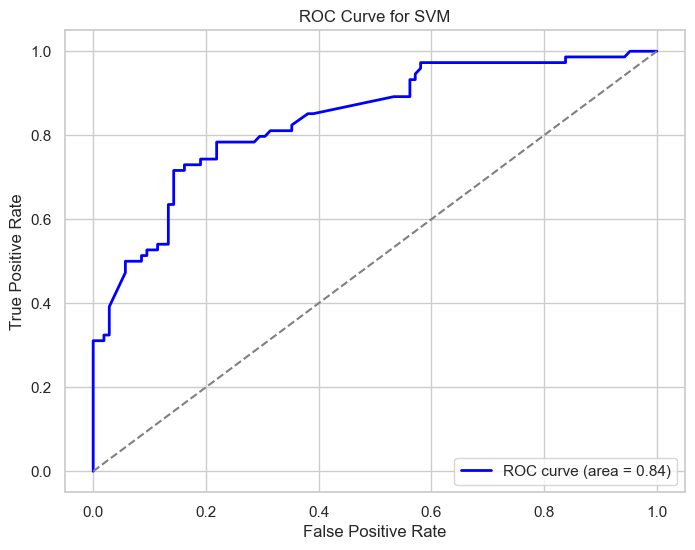

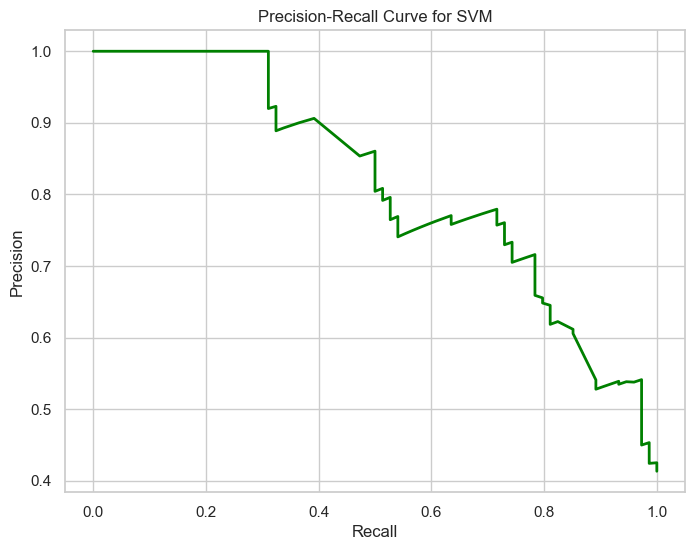

In [90]:
# Evaluate SVM on the test set
y_pred_svm = best_svm_model.predict(X_test)

# Confusion Matrix for SVM
cm = confusion_matrix(y_test, y_pred_svm)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Survived', 'Survived'], yticklabels=['Not Survived', 'Survived'])
plt.title('Confusion Matrix for SVM')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# Classification Report for SVM
print("SVM Classification Report:\n", classification_report(y_test, y_pred_svm))

# ROC Curve for SVM
fpr, tpr, thresholds = roc_curve(y_test, best_svm_model.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.title('ROC Curve for SVM')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()

# Precision-Recall Curve for SVM
precision, recall, _ = precision_recall_curve(y_test, best_svm_model.predict_proba(X_test)[:, 1])
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='green', lw=2)
plt.title('Precision-Recall Curve for SVM')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()


Confusion Matrix:
[[91 14]
 [21 53]]


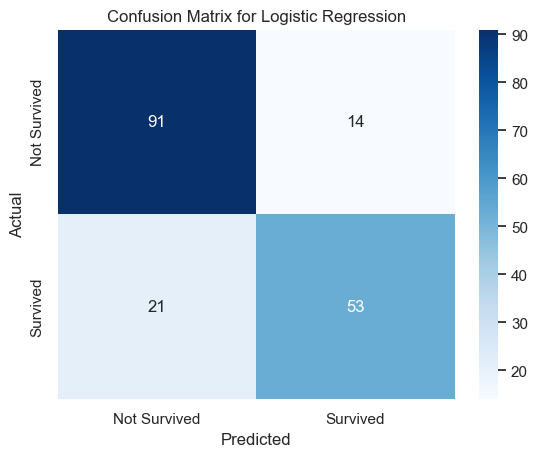

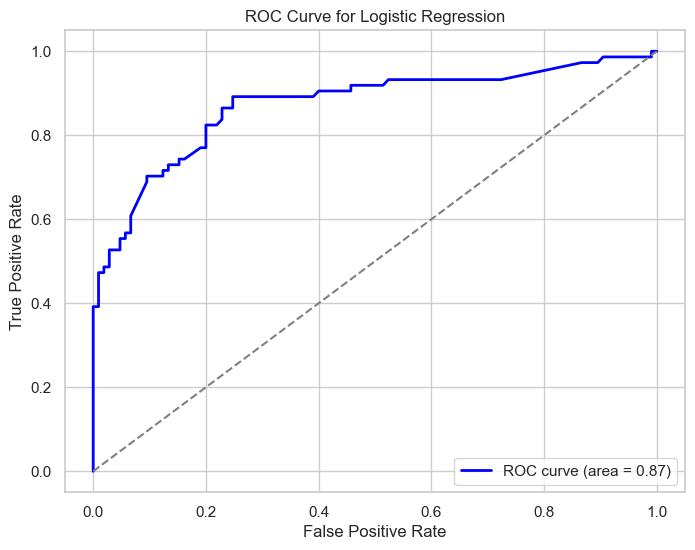

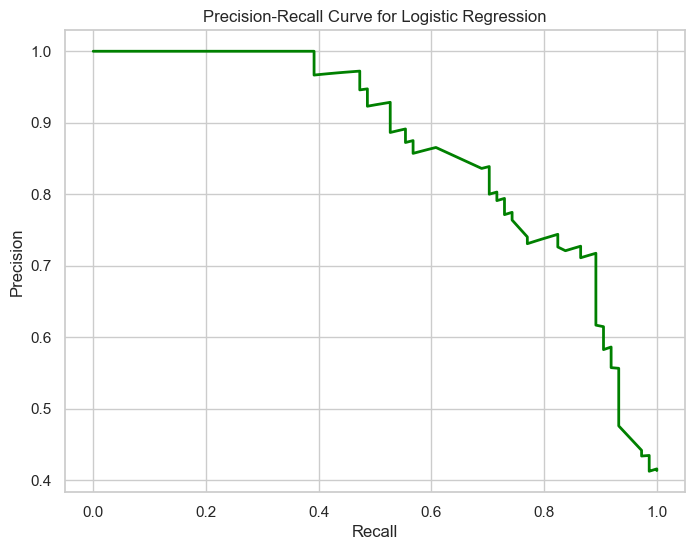

In [101]:
# Logistic Regression Confusion Matrix
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Visualizing the confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Survived', 'Survived'], yticklabels=['Not Survived', 'Survived'])
plt.title('Confusion Matrix for Logistic Regression')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()
# ROC curve
fpr, tpr, _ = roc_curve(y_test, model.predict_proba(X_test_scaled)[:, 1])
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.title('ROC Curve for Logistic Regression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()
#Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, model.predict_proba(X_test_scaled)[:, 1])

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='green', lw=2)
plt.title('Precision-Recall Curve for Logistic Regression')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()



## Step 6: Model Interpretation and Conclusion

### Interpret the Results:
- The key features that contributed the most to the Titanic survival prediction were:
  - **Pclass**: 1st class passengers had a higher chance of survival.
  - **Age**: Younger passengers had a higher likelihood of survival.
  - **Sex**: Females had a higher survival rate.
  
- Feature Importance: 
  - For Logistic Regression, **Pclass** and **Sex** were the most significant features based on the model’s coefficients.

### Summarize Key Findings:
- The **Logistic Regression** model achieved an accuracy of **0.80**, while the **SVM** model performed slightly worse with **0.79** accuracy.
- Both models performed well, but **Logistic Regression** was slightly more accurate overall.
  
### Conclusion:
- Based on performance metrics, **Logistic Regression** was chosen as the best model for predicting Titanic survival.
- The model’s reliability is sufficient for real-world predictions, but improvements can be made through additional features and advanced models.